In [1]:
from uncertainties import ufloat, unumpy
from uncertainties.umath import *
from uncertainties.unumpy import nominal_values as nv
from uncertainties.unumpy import std_devs as sd
from dataclasses import dataclass
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
%matplotlib inline

In [2]:
albg_t_s = ufloat(3545,1)
albg_N = ufloat(1000,sqrt(1000))
albg_I = albg_N/albg_t_s
albg_I

0.2820874471086037+/-0.008920743227486653

In [3]:
@dataclass
class material:
    d:ufloat
    n:ufloat
    t:ufloat
    rho:float
    z:int
    a:float
Ag = material(
    d = ufloat(0.1,0.005),
    n = ufloat(602,sqrt(602)),
    t = ufloat(266,1),
    rho = 10.5,
    z = 47,
    a = 107.9)
Al1 = material(
    d = ufloat(0.34,0.01),
    n = ufloat(201,sqrt(201)),
    t = ufloat(175,1),
    rho = 2.7,
    z = 13,
    a = 27)
Al2 = material(
    d = ufloat(0.44,0.01),
    n = ufloat(219,sqrt(219)),
    t = ufloat(183,1),
    rho = 2.7,
    z = 13,
    a = 27.0)
Pb = material(
    d = ufloat(0.094,0.005),
    n = ufloat(734,sqrt(734)),
    t = ufloat(225,1),
    rho = 11.35,
    z = 82,
    a = 207.2)
measurements = [Ag,Al1,Al2,Pb]

In [4]:
for element in measurements:
    element.I = element.n/element.t-albg_I
    element.drho = element.d*element.rho
    element.y = element.I/element.drho
    element.x = element.z**2/element.a
    element.comp = element.y/element.x
    print(element.comp)

0.092+/-0.006
0.151+/-0.015
0.123+/-0.011
0.086+/-0.006


<ErrorbarContainer object of 3 artists>

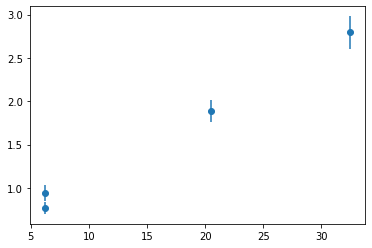

In [5]:
y = nv([el.y for el in measurements])
yerr = sd([el.y for el in measurements])
x = nv([el.x for el in measurements])
plt.errorbar(x,y,yerr=yerr,fmt='o')

In [6]:
y = [(measurements[0].y+measurements[1].y)/2,measurements[2].y,measurements[3].y]
yerr = sd(y)
y = nv(y)
x = [(x[0]+x[1])/2,x[2],x[3]]
linmod = LinearModel()
fitres = linmod.fit(y,x=x,weights=1/yerr)

Text(0.5, 0, '$Z^2/A$')

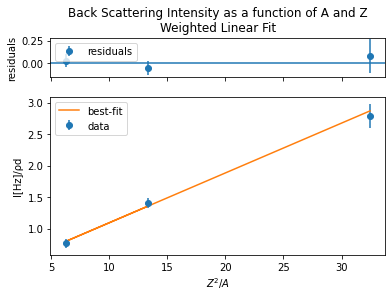

In [7]:
fig = plt.figure()
fig, gridspec = fitres.plot(fig=fig)
fig.get_axes()[0].set_title("Back Scattering Intensity as a function of A and Z\nWeighted Linear Fit")
fig.get_axes()[1].set_ylabel('I[Hz]/ρd')
fig.get_axes()[1].set_xlabel('$Z^2/A$')


In [8]:
print(str.format(fitres.fit_report()))

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 3
    # variables        = 2
    chi-square         = 0.79758872
    reduced chi-square = 0.79758872
    Akaike info crit   = 0.02567651
    Bayesian info crit = -1.77709891
[[Variables]]
    slope:      0.07909829 +/- 0.00657243 (8.31%) (init = 1)
    intercept:  0.30509373 +/- 0.08602599 (28.20%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.848
